<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Text-Based-AI/blob/master/trump_biden_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Exercise performs some basic Text Processing on the Last 2 Presidential debates between President Trump and Joe Biden.<br>It involves scraping the data and performing some text-preprocessing tasks to understand more about the words spoken by these two Aspirants, during the 2020 Presidential Debates.

[Debate_1](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020)

[Debate_2](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import string                                                                                                                                                       
print('All Imported!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
All Imported!


In [2]:
debate_1 = "https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020"
debate_2 = 'https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp'

We need to scrape the data containing the texts from both debates.
Lets define a method that uses beautiful soup to parse the text data and returns two lists, of the interactions of both Trump and Biden.

In [3]:
def scrape_parse(link):
    """Scrape and preprocess text from rev.com,
        For Trump/Biden Presidential Debates
    
    @param,link: URL link to the website(rev.com)
    @return: Two lists (trump and biden)
    """
    source = requests.get(link).text
    soup = BeautifulSoup(source, 'lxml')
    texts = soup.findAll('p')
    corpus = [txt.text for txt in texts]

    if len(link) > 100:
        trump_corpus = [i for i in corpus if i.startswith('Donald')]
        biden_corpus = [i for i in corpus if i.startswith('Joe')]
    else:
        trump_corpus = [i for i in corpus if i.startswith('President')]
        biden_corpus = [i for i in corpus if i.startswith('Vice')]
        
    return trump_corpus, biden_corpus

In [4]:
# getting the list of speeches from the first debate
trump_debate_1, biden_debate_1 = scrape_parse(debate_1)

In [5]:
# getting the list of speeches for the second debate
trump_debate_2, biden_debate_2 = scrape_parse(debate_2)

In [6]:
print(f'Trump spoke {len(trump_debate_1)} times in debate one and {len(trump_debate_2)} times in two.')
print(f'Biden spoke {len(biden_debate_1)} times in debate one and {len(biden_debate_2)} times in two.')

Trump spoke 314 times in debate one and 196 times in two.
Biden spoke 250 times in debate one and 133 times in two.


<h3>1. Let's see the percentage of times each person took the stage</h3>

In [7]:
first = {'Trump':[len(trump_debate_1)], 'Biden':[len(biden_debate_1)]}
second = {'Trump':[len(trump_debate_2)], 'Biden':[len(biden_debate_2)]}
first_df = pd.DataFrame(first)
second_df = pd.DataFrame(second)

In [8]:
# Let's make each a percent
total_stage1 = len(trump_debate_1 + biden_debate_1)
total_stage2 = len(trump_debate_2 + biden_debate_2)

# Let's use apply and lambda
first_df = first_df.apply(lambda x: round(x / total_stage1, 2))
second_df = second_df.apply(lambda x: round(x / total_stage2, 2))

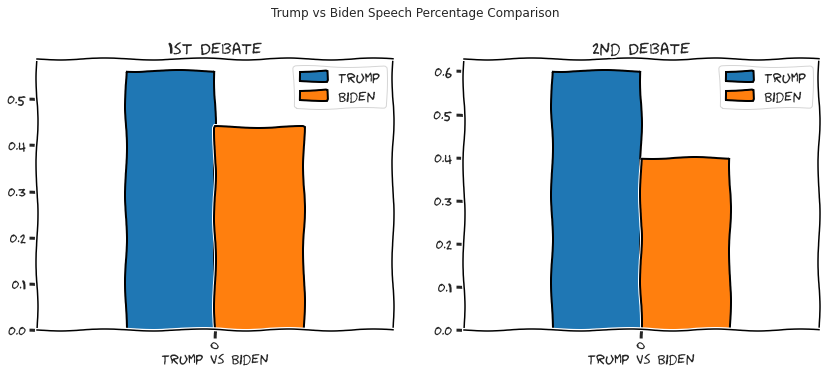

In [9]:
sns.set_style('ticks')
fig = plt.figure(figsize=(14,5)) # create figure
plt.suptitle('Trump vs Biden Speech Percentage Comparison', y=1.025)

plt.xkcd()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

first_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('1st Debate')
ax0.set_xlabel('Trump vs Biden')

second_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax1)
plt.title('2nd Debate')
plt.xlabel('Trump vs Biden')


plt.show()

#plt.rcdefaults()  # to stop xkcd plots

<h3>2. Let's check the lexical richness of the words spoken by Trump and Biden</h3>

We'd iterate through the words, clean them by removing punctuations, then we tokenize the words. Let's define a few helper functions. In a President class.

In [37]:
class Presidential(object):
    """A class for Presidential Candidates debate
    """
    _class_info = 'Presidential Aspirants'


    def __init__(self, first_name, last_name, party, corpus1, corpus2):
        """Initialise members of the Presidential Class
        """
        self.first_name = first_name
        self.last_name = last_name
        self.party = party
        self.corpus1 = corpus1
        self.corpus2 = corpus2

    def __str__(self):
        string = f"Hello, my name is {self.first_name} {self.last_name},"
        office = f"I'm the {self.party} party, Presidential Candidate."
        return string + " " + office


    def word_tokenyze(self, index):
        """Convert a list of sentences(corpus)
            into a list of words

            @param,index: Index of the corpus(int)
            @return: A list of words
        """
        # first remove Debater's name,
        # Then split the sentence to words
        corpus = None
        if index == 1:
            corpus = self.corpus1
        else:
            corpus = self.corpus2
            
        word_list = []
        for speech in corpus:
            word_list += speech.split()[5:]

        return word_list


    def remove_punctuations(self, word_list=None):
        """Remove punctuations from a 
            list of words

            @param word_list: A list of words(str)
            @return: A list of words without Punctuations
        """ 
        no_puncs = [word.translate(str.maketrans("","",string.punctuation)) \
                for word in word_list]

        return no_puncs


    def remove_stopwords(self, word_list=None):
        """Remove stopwords from a list
            of words

            @param word_list: A list of words(str)
            @return: a list with no stopwords
        """
        clean_words = [word for word in word_list if word \
                    not in stopwords.words('english')]

        return clean_words


    def get_unique_tokens(self, word_list=None):
        """Get unique words in a list
            of words.

            @param word_list: A list of words(str)
            @return: number of unique words(int)
        """
        unique_tokens = list(set(word_list))

        return len(unique_tokens)


    def get_total_words(self, index):
        """Get total words in a list
            of sentences.

            This does not include stopwords.

            @param word_list: A list of words(str)
            @return: number of unique words(int)
        """
        corpus = None
        if index == 1:
            corpus = self.corpus1
        else:
            corpus = self.corpus2

        word_list = self.word_tokenyze(corpus)
        word_list = self.remove_punctuations(word_list)
        word_list = self.remove_stopwords(word_list)

        return len(word_list)


    def lexical_rich(self, index):
        """Return the percent of unique words,
            to total words spoken

            @param,speech_list: A list of speech items
            @return: Percent of unique words(float)
        
        """
        #  Do word_tokenization
        word_list = self.word_tokenyze(index)
        # Remove Punctuations
        word_list = self.remove_punctuations(word_list)
        # Remove stopwords
        word_list = self.remove_stopwords(word_list)
        # Get unique tokens
        unique_tokens = self.get_unique_tokens(word_list)
        # Get total words
        total_words = self.get_total_words(index)
        lex_richness = round(unique_tokens / total_words, 2)

        return lex_richness, unique_tokens, total_words, word_list

Finally, let's put it together and compute the lexical richness for each of em

In [38]:
trump = Presidential('Donald', 'Trump', 'Republican', trump_debate_1, trump_debate_2)
biden = Presidential('Joe', 'Biden', 'Democrat', biden_debate_1, biden_debate_2)

In [23]:
print(trump)

Hello, my name is Donald Trump, I'm the Republican party, Presidential Candidate.


In [24]:
print(biden)

Hello, my name is Joe Biden, I'm the Democrat party, Presidential Candidate.


In [25]:
lex_rich_df = pd.DataFrame(columns=['Debate-1', 'Debate-2'], index=['Trump', 'Biden'])

for index, row in lex_rich_df.iterrows():
    if index == 'Trump':
        row['Debate-1'] = trump.lexical_rich(1)[0]
        row['Debate-2'] = trump.lexical_rich(2)[0]
    else:
        row['Debate-1'] = biden.lexical_rich(1)[0]
        row['Debate-2'] = biden.lexical_rich(2)[0]

lex_rich_df = lex_rich_df.T
lex_rich_df

,Trump,Biden
Debate-1,0.28,0.35
Debate-2,0.3,0.37


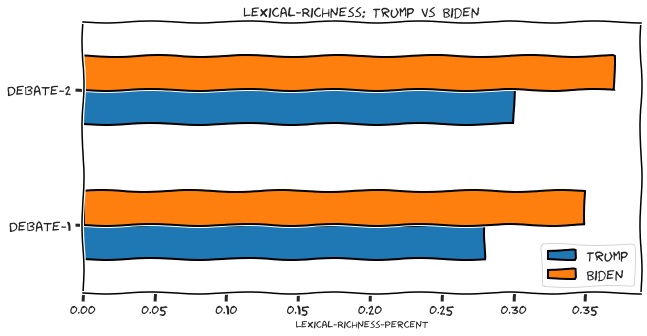

In [26]:
lex_rich_df.plot(kind='barh', edgecolor='black', linewidth=2, figsize=(10,5))

plt.title('Lexical-Richness: Trump vs Biden', fontsize=14)
plt.xlabel('Lexical-Richness-Percent', fontsize=10)

plt.show()

Debug total words in pycharm script